# Supervised Learning - Telco Customer Churn

## Data pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, linear_model, neighbors
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
import time

%matplotlib inline

# import data
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2.csv')

# set target data
churn_target = churn_data.iloc[:,-1]

# set feature data
churn_data.drop(["customerID","Churn"], axis=1, inplace=True)

# set training and test variables
X = np.array(churn_data)
y = np.array(churn_target)

# set variables for target and features
features = list(churn_data)
targets = list(churn_target)

# divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# set seaborn style and fontsize
sb.set_style('ticks')
sb.set_context('paper', font_scale=1.6)

# data normalization
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Decision Trees - Gini criterion

### Training time and accuracy - Gini

In [40]:
#define the model
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3)

# fit the model and time it
start = time.time()

clf_gini.fit(X_train, y_train)

stop = time.time()

training_gini = stop - start
print(f"Training: {training_gini} seconds")

# get predicted values
y_pred_gini = clf_gini.predict(X_test)

# get accuracy
accuracy_gini = accuracy_score(y_test,y_pred_gini)*100
print (f"Accuracy : {accuracy_gini}%")

Training: 0.0111541748046875 seconds
Accuracy : 78.70722433460075%


### Feature Importance - Gini

<AxesSubplot:>

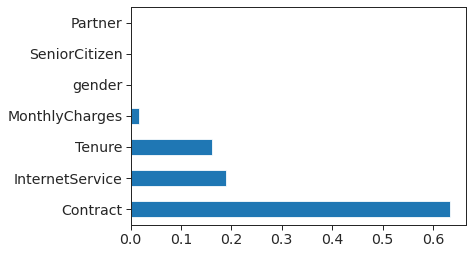

In [3]:
# get feature importance
importances_gini = clf_gini.feature_importances_

# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feat_importances_gini = pd.Series(importances_gini, index=churn_data.columns)
feat_importances_gini.nlargest(7).plot(kind='barh')

### Confusion Matrix - Gini

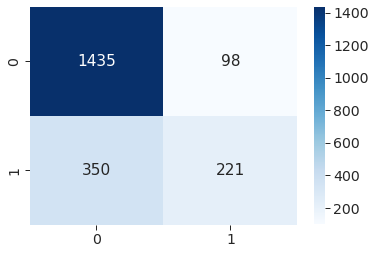

In [4]:
# plot confusion matrix
confusion_matrix_gini = sb.heatmap(confusion_matrix(y_test, y_pred_gini),annot=True,cmap='Blues', fmt='g')

### Classification Report - Gini

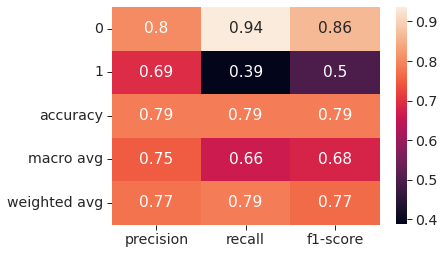

In [5]:
# plot classification report
clf_report_gini = classification_report(y_test, 
                                   y_pred_gini,
                                   output_dict=True)
classification_report_gini = sb.heatmap(pd.DataFrame(clf_report_gini).iloc[:-1, :].T, annot=True)

### Decision Tree plot - Gini

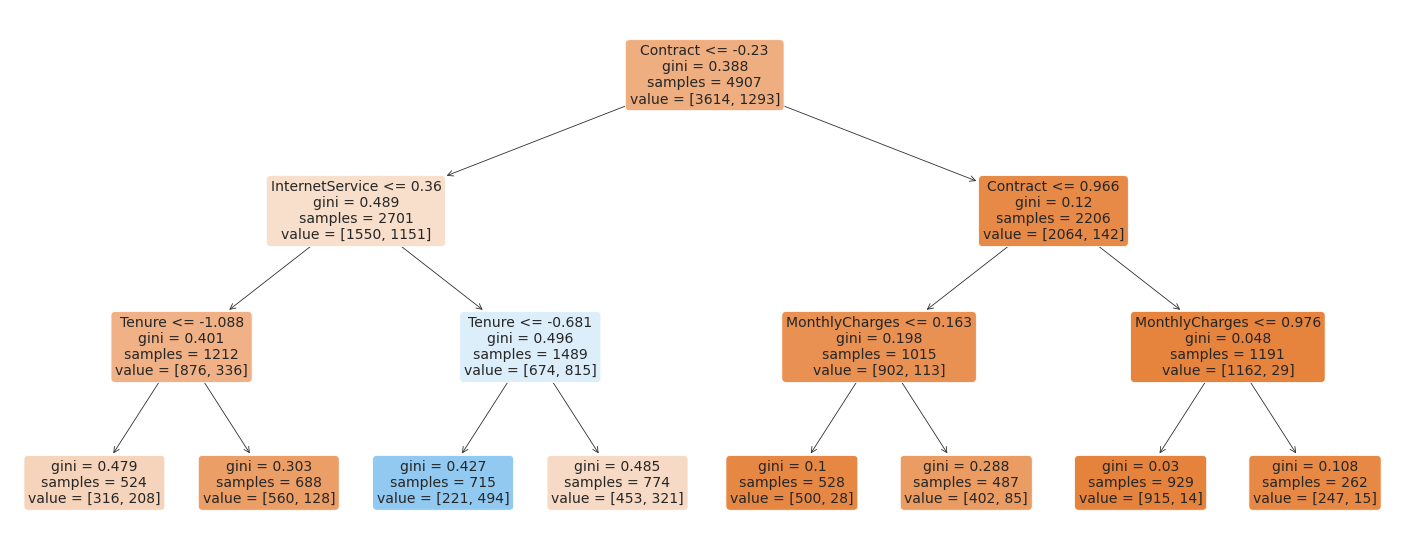

In [6]:
# plot decision tree
plt.figure(figsize=(25,10))
plot_tree_gini = plot_tree(clf_gini, 
              feature_names=features, 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Decision Trees - Entropy criterion

### Training time and Accuracy - Entropy

In [39]:
#define the model
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# fit the model and time it
start = time.time()

clf_entropy.fit(X_train, y_train)

stop = time.time()

training_entropy = stop - start
print(f"Training: {training_entropy} seconds")

# get predicted values
y_pred_entropy = clf_entropy.predict(X_test)

# get accuracy
accuracy_entropy = accuracy_score(y_test,y_pred_entropy)*100
print (f"Accuracy : {accuracy_entropy}%")


Training: 0.013260602951049805 seconds
Accuracy : 78.70722433460075%


### Feature Importance - Entropy

<AxesSubplot:>

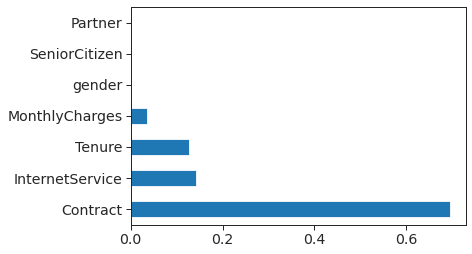

In [26]:
# get feature importance
importances_entropy = clf_entropy.feature_importances_

# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
feat_importances_entropy = pd.Series(importances_entropy, index=churn_data.columns)
feat_importances_entropy.nlargest(7).plot(kind='barh')

### Confusion Matrix - Entropy

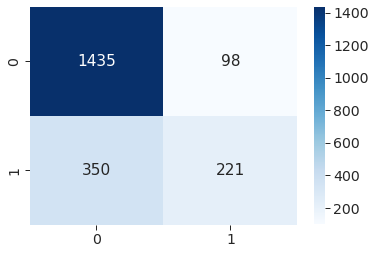

In [9]:
# plot confusion matrix
confusion_matrix_entropy = sb.heatmap(confusion_matrix(y_test, y_pred_entropy),annot=True,cmap='Blues', fmt='g')

### Classification Report - Entropy

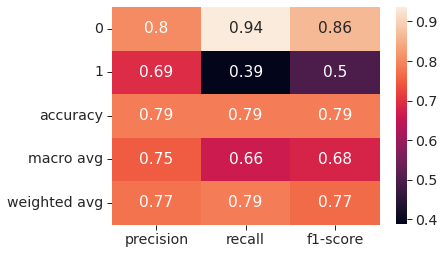

In [10]:
# plot classification report
clf_report_entropy = classification_report(y_test, 
                                   y_pred_entropy,
                                   output_dict=True)
classification_report_entropy = sb.heatmap(pd.DataFrame(clf_report_entropy).iloc[:-1, :].T, annot=True)

### Decision Tree plot - Entropy

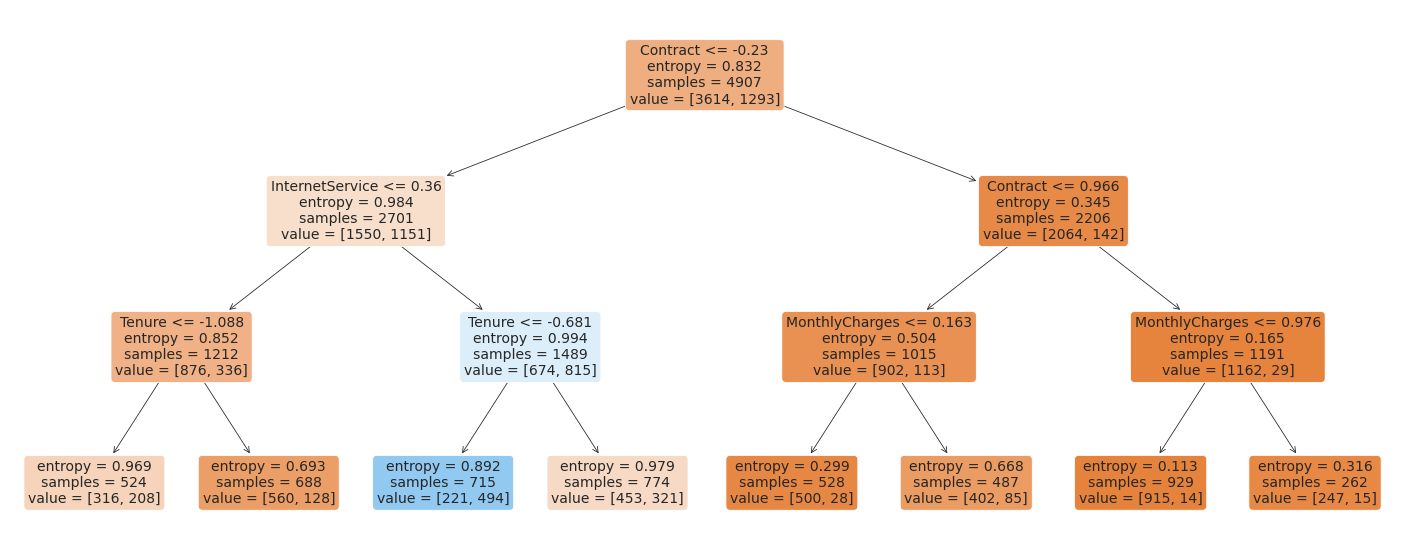

In [11]:
# plot decision tree
plt.figure(figsize=(25,10))
plot_tree_entropy = plot_tree(clf_entropy, 
              feature_names=features, 
              filled=True, 
              rounded=True, 
              fontsize=14)

## K-Nearest Neighbor

### Training time and Accuracy

In [12]:
# initialize the class with the number of neighbours wanted
clf_knn = KNeighborsClassifier(n_neighbors=5)

#fit the model and time it
start = time.time()

clf_knn.fit(X_train, y_train)

stop = time.time()

training_knn = stop - start
print(f"Training: {training_knn} seconds")
print()

# get predicted values
y_pred_knn = clf_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test,y_pred_knn)*100
print (f"Accuracy: {accuracy_knn}%")
print()

Training: 0.0022726058959960938 seconds

Accuracy: 75.0%



### Confusion Matrix

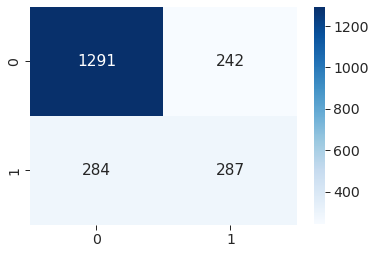

In [13]:
# plot confusion matrix
confusion_matrix_knn = sb.heatmap(confusion_matrix(y_test, y_pred_knn),annot=True,cmap='Blues', fmt='g')

### Classification Report

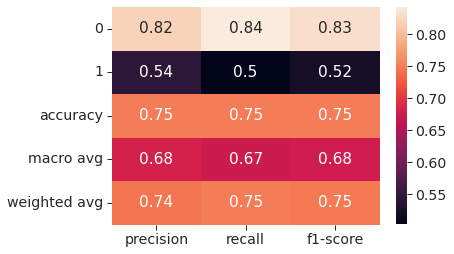

In [14]:
# plot classification report
clf_report_knn = classification_report(y_test,
                                   y_pred_knn,
                                   output_dict=True)
classification_report_knn = sb.heatmap(pd.DataFrame(clf_report_knn).iloc[:-1, :].T, annot=True)

### Error rate for K value

Text(0, 0.5, 'Mean Error')

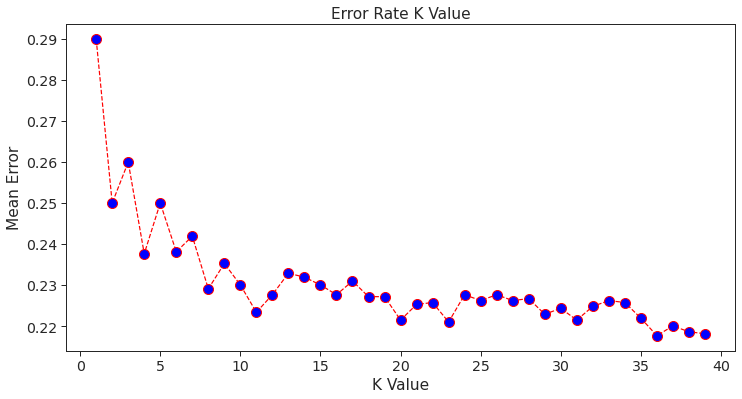

In [15]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Support Vector Machines

### Training time and Accuracy

In [42]:
#create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#fit the model and time it
start = time.time()

#train the model using the training sets
clf_svm.fit(X_train, y_train)

stop = time.time()

training_svm = stop - start
print(f"Training: {stop - start} seconds")

#predict the response for test dataset
y_pred_svm = clf_svm.predict(X_test)

# get accuracy
accuracy_svm = accuracy_score(y_test,y_pred_svm)*100
print (f"Accuracy : {accuracy_svm}%")

Training: 0.9073774814605713 seconds
Accuracy : 78.99239543726236%


### Confusion Matrix

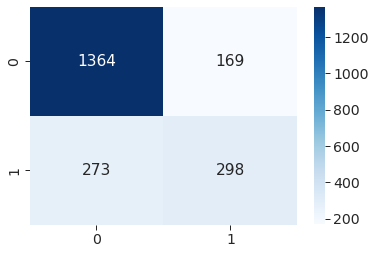

In [17]:
# plot confusion matrix
confusion_matrix_svm = sb.heatmap(confusion_matrix(y_test, y_pred_svm),annot=True,cmap='Blues', fmt='g')

### Classification Report

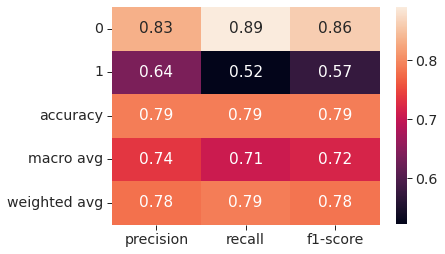

In [18]:
# plot classification report
clf_report_svm = classification_report(y_test,
                                   y_pred_svm,
                                   output_dict=True)
classification_report_svm = sb.heatmap(pd.DataFrame(clf_report_svm).iloc[:-1, :].T, annot=True)

### Plot

ValueError: operands could not be broadcast together with shapes (50,2) (19,) 

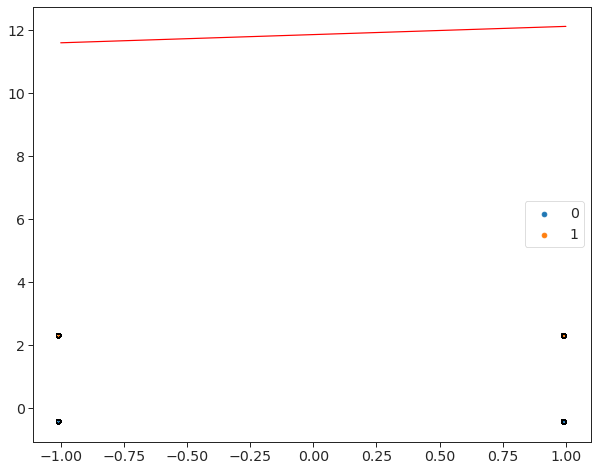

In [19]:
plt.figure(figsize=(10, 8))

# Plotting our two-features-space
sb.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8)

# Constructing a hyperplane using a formula.
w = clf_svm.coef_[0]           # w consists of 2 elements
b = clf_svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

# Encircle support vectors
plt.scatter(clf_svm.support_vectors_[:, 0],
            clf_svm.support_vectors_[:, 1],
            s=19,
            facecolors='none',
            edgecolors='k',
            alpha=.5)

# Step 2 (unit-vector):
w_hat = clf_svm.coef_[0] / (np.sqrt(np.sum(clf_svm.coef_[0] ** 2)))

# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(clf_svm.coef_[0] ** 2))

# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Plot margin lines# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)